In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
'''
Little example on how to use the Network class to create a model and perform
a basic classification of the MNIST dataset
'''

#from NumPyNet.layers.input_layer import Input_layer
from NumPyNet.layers.connected_layer import Connected_layer
from NumPyNet.layers.convolutional_layer import Convolutional_layer
from NumPyNet.layers.maxpool_layer import Maxpool_layer
from NumPyNet.layers.softmax_layer import Softmax_layer
# from NumPyNet.layers.dropout_layer import Dropout_layer
# from NumPyNet.layers.cost_layer import Cost_layer
# from NumPyNet.layers.cost_layer import cost_type
from NumPyNet.layers.batchnorm_layer import BatchNorm_layer
from NumPyNet.network import Network
from NumPyNet.optimizer import Adam
# from NumPyNet.optimizer import Adam, SGD, Momentum
from NumPyNet.utils import to_categorical
from NumPyNet.utils import from_categorical
from NumPyNet.metrics import mean_accuracy_score

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

__author__ = ['Mattia Ceccarelli', 'Nico Curti']
__email__ = ['mattia.ceccarelli3@studio.unibo.it', 'nico.curti2@unibo.it']


def accuracy (y_true, y_pred):
  '''
  Temporary metrics to overcome "from_categorical" missing in standard metrics
  '''
  truth = from_categorical(y_true)
  predicted = from_categorical(y_pred)
  return mean_accuracy_score(truth, predicted)




Version  1.0.4


In [4]:
np.random.seed(123)

digits = datasets.load_digits()
X, y = digits.images, digits.target

# del digits

# add channels to images
X = np.asarray([np.dstack((x, x, x)) for x in X])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=.2,
                                                  random_state=42)

batch = 128
num_classes = len(set(y))

# del X, y

# normalization to [0, 1]
X_train *= 1. / 255.
X_test  *= 1. / 255.

# reduce the size of the data set for testing
############################################

# train_size = 512
# test_size  = 300



# X_train = X_train[:train_size, ...]
# y_train = y_train[:train_size]
# X_test  = X_test[ :test_size,  ...]
# y_test  = y_test[ :test_size]

############################################

n_train = X_train.shape[0]
n_test  = X_test.shape[0]

# transform y to array of dimension 10 and in 4 dimension
y_train = to_categorical(y_train).reshape(n_train, 1, 1, -1)
y_test  = to_categorical(y_test).reshape(n_test, 1, 1, -1)

# Create the model and training
model = Network(batch=batch, input_shape=X_train.shape[1:])

model.add(Convolutional_layer(size=3, filters=32, stride=1, pad=True, activation='Relu'))

model.add(BatchNorm_layer())

model.add(Maxpool_layer(size=2, stride=1, padding=True))

model.add(Connected_layer(outputs=100, activation='Relu'))

model.add(BatchNorm_layer())

model.add(Connected_layer(outputs=num_classes, activation='Linear'))

model.add(Softmax_layer(spatial=True, groups=1, temperature=1.))
# model.add(Cost_layer(cost_type=cost_type.mse))

# model.compile(optimizer=SGD(lr=0.01, decay=0., lr_min=0., lr_max=np.inf))
model.compile(optimizer=Adam(), metrics=[accuracy])

print('*************************************')
print('\n Total input dimension: {}'.format(X_train.shape), '\n')
print('**************MODEL SUMMARY***********')

model.summary()

print('\n***********START TRAINING***********\n')

# Fit the model on the training set
model.fit(X=X_train, y=y_train, max_iter=10, verbose=True)

print('\n***********START TESTING**************\n')

# Test the prediction with timing
loss, out = model.evaluate(X=X_test, truth=y_test, verbose=True)

truth = from_categorical(y_test)
predicted = from_categorical(out)
accuracy  = mean_accuracy_score(truth, predicted)

print('\nLoss Score: {:.3f}'.format(loss))
print('Accuracy Score: {:.3f}'.format(accuracy))
# SGD : best score I could obtain was 94% with 10 epochs, lr = 0.01 %
# Momentum : best score I could obtain was 93% with 10 epochs
# Adam : best score I could obtain was 95% with 10 epochs


  0%|          | 0/10 [00:00<?, ?it/s]

*************************************

 Total input dimension: (1437, 8, 8, 3) 

**************MODEL SUMMARY***********
layer       filters  size              input                output
   0 input                   128 x   8 x   8 x   3   ->   128 x   8 x   8 x   3
   1 conv     32 3 x 3 / 1   128 x   8 x   8 x   3   ->   128 x   8 x   8 x  32  0.000 BFLOPs
   2 batchnorm                       8 x   8 x  32 image
   3 max         2 x 2 / 1   128 x   8 x   8 x  32   ->   128 x   7 x   7 x  32
   4 connected               128 x   7 x   7 x  32   ->   128 x 100
   5 batchnorm                       1 x   1 x 100 image
   6 connected               128 x   1 x   1 x 100   ->   128 x  10
   7 softmax x entropy                                    128 x   1 x   1 x  10

***********START TRAINING***********

unequal batch sizes...adjusting.


100%|██████████| 10/10 [00:37<00:00,  3.71s/it]


***********START TESTING**************

360/360 |██████████████████████████████████████████████████| (0.0 sec/iter) loss: 0.065
Prediction on 360 samples took 0.1 sec

Loss Score: 0.024
Accuracy Score: 0.986


In [5]:
L=model._net[1]

In [6]:
L.weights.shape

(3, 3, 3, 32)

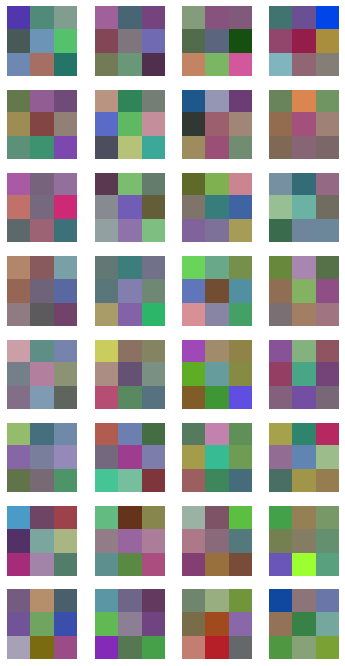

In [7]:
num_filters=L.weights.shape[-1]

w=L.weights
w=w-w.min()
w=w/w.max()
figure(figsize=(6,12))
for f in range(num_filters):
    subplot(8,4,f+1)
    im=w[:,:,:,f]    
    imshow(im)
    axis('off')

In [8]:
X.max()

16.0

In [9]:
X.min()

0.0

In [10]:
X_train.min()

0.0

In [11]:
X_train.max()

0.06274509803921569

In [12]:
digits = datasets.load_digits()
X, y = digits.images, digits.target

In [13]:
X.shape

(1797, 8, 8)

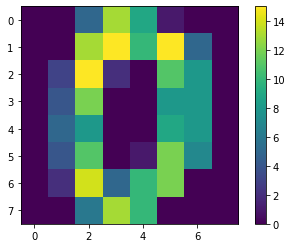

In [15]:
imshow(X[0,:,:])
colorbar()

In [16]:
X[0,:,:]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])